<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Santiago Caicedo
- Samuel Aparicio

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Lineal_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [1]:
### TU CÓDIGO AQUÍ ###
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). **Esta es la variable objetivo.**
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [2]:
# Carga el dataset
### TU CÓDIGO AQUÍ ###
df = pd.read_csv('car data.csv')

In [3]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


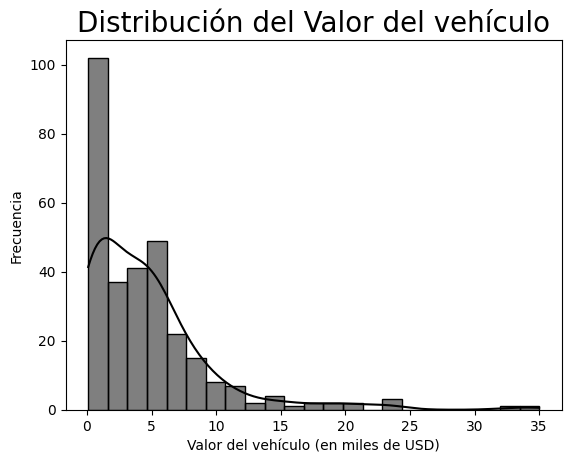

In [14]:
# Grafica un histograma para ver la distribución de la variable objetivo "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.histplot(df['Selling_Price'], kde=True, color='black')
plt.title('Distribución del Valor del vehículo', fontsize=20)
plt.xlabel('Valor del vehículo (en miles de USD)')
plt.ylabel('Frecuencia')
plt.show()


Escribe tus conclusiones aquí.

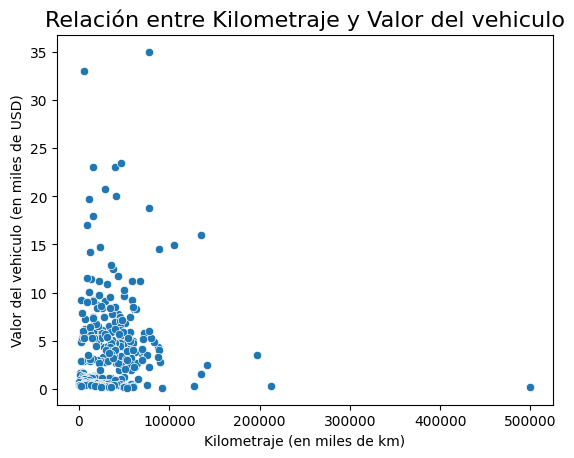

In [15]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Relación entre Kilometraje y Valor del vehiculo', fontsize=16)
plt.xlabel('Kilometraje (en miles de km)')
plt.ylabel('Valor del vehiculo (en miles de USD)')
plt.show()


Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?

- De este analisis podemos observar que la relación es inversamente proporcional, con esto indicamos que entre más kilometros tiene de uso vale menos el carro; lo que es correcto economicamente de acuerdo a que los vehiculos entre mayor se ha su uso por el desgaste pierden su valor monetario

In [16]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
df['Car_Age'] = 2025 - df['Year']


In [17]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
df.drop('Car_Name', axis=1, inplace=True)


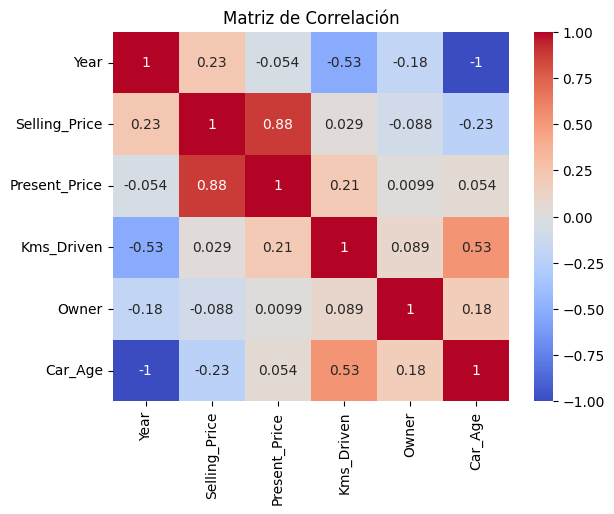

In [19]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
df_numeros = df.select_dtypes(include=[np.number])
corr_matrix = df_numeros.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Escribe tus conclusiones aquí.
Estas conclusiones se dan con el supuesto de que en valor absoluto toda correlación igual o superior a 0.5 sera tenida cuenta

- Como es de esperar la variable año que indica el año de fabricación y la edad del vehiculo son inversamente proporcionales, lo que es logico debido a que entre es más reciente el año de fabrica menos debe ser su ¨edad¨
- Por otro lado más que ser una relación proporcional, es una condición economica en el mercado y sucede que un vehiculo usado se vende menor por su valor de mercado por lo que si este valor de mercado aumenta el otro aumenta y viceversa
- Por otro lado por contexto economico tiene razón y es una dirreción proporcional entre kilometros conducidos y edad del auto, asi como inversa en kilometros conducidos a su año de fabricación

- por ultimo puede ser por proporción pero apezar que no se nota se esperaba una relación inversa entre kilometros conducidos y precio de venta

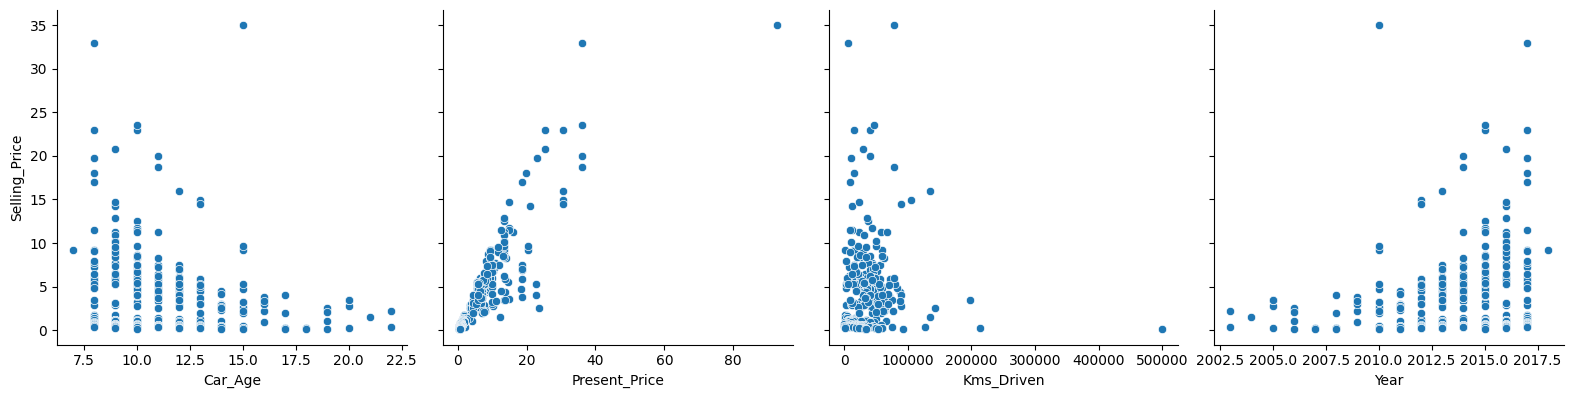

In [22]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.pairplot(df, x_vars=['Car_Age', 'Present_Price', 'Kms_Driven','Year'], y_vars='Selling_Price', height=4)


Escribe tus conclusiones aquí.
- con respecto a la edad del vehiculo como podemos observar que entre menos es su edad mayor es su valor como se ha venido mencionando
- al igual con el precio del presente entre más alto es más aumenta
- de los kilometros conducidos podriamos notar que incluso vehiculos con 300.000 o 400.000 no se venden y existe solo un dato atipico demostrando que hay una barrera de preferencias

In [24]:
# Convierte variables categóricas a numéricas para que el modelo las entienda.
# La regresión lineal no puede trabajar con texto ('Petrol', 'Dealer').
# Usaremos One-Hot Encoding con pd.get_dummies() para convertirlas.
# drop_first=True es importante para evitar multicolinealidad perfecta en las variables dummy
### TU CÓDIGO AQUÍ ###
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True, dtype= int)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1


# 4. Construcción y Evaluación del Modelo

In [25]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [26]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del dataset original: {X.shape[0]} filas")
print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del set de prueba: {X_test.shape[0]} filas")


Tamaño del dataset original: 299 filas
Tamaño del set de entrenamiento: 239 filas
Tamaño del set de prueba: 60 filas


In [27]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###
modelo_ml = LinearRegression()
modelo_ml.fit(X_train, y_train)

LinearRegression()

In [28]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
predicciones = modelo_ml.predict(X_test)

In [30]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###
predicciones_train = modelo_ml.predict(X_train)
predicciones_test = modelo_ml.predict(X_test)
mse_train = mean_squared_error(y_train, predicciones_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, predicciones_train)
print(f"Métricas de Desempeño sobre el Conjunto de Entranamiento:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse_train:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2_train:.4f}")

Métricas de Desempeño sobre el Conjunto de Entranamiento:
-------------------------------------------------
Error Cuadrático Medio (MSE): 2.3293
Raíz del Error Cuadrático Medio (RMSE): 1.5262
Coeficiente de Determinación (R-cuadrado): 0.9049


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.

- En este caso, el RMSE obtenido es de 2.524, lo que significa que el modelo se equivoca aproximadamente en 2.5 miles de dólares (es decir, unos 2 500 USD) por vehículo. Este resultado sugiere que las predicciones son razonablemente precisas, teniendo en cuenta que los precios en el conjunto de datos están expresados en miles de dólares y pueden variar ampliamente entre los distintos tipos de vehículos.



2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

- Como recomendación, este modelo puede considerarse un buen punto de partida para el análisis, ya que presenta un desempeño aceptable con un R² de 0.75, lo que indica que explica cerca del 75 % de la variabilidad en los precios. Sin embargo, aún hay espacio para mejorar ajustando hiperparámetros teniendo encuenta que con el entrenamiento se logro comprender en un 90 %, incorporando más variables relevantes o utilizando modelos más complejos.

